In [1]:
import numpy as np
from physicsinformed_project1 import PhysicsInformedBarModel
import torch
import matplotlib.pyplot as plt
import utilities

In [2]:
samples = 50

In [3]:
E =  1.44*(10**3)
nu = 0.38
P = 100*(10**-6)
l = 11.01*(10**-6)
L,b,h = 40*l,4*l,2*l
I = (b*(h**3))/12
mu = (E/(1+nu))*0.5*(10**-6)
A = b*h
D1 = (E*I)*(10**18)
D2 = 0
arr = np.zeros(50)
arr[-1]= P
distLoad = lambda x: P*x
u0 = [0,0,0,0,0,0]
# print(distLoad(0.0))
# print(D1,D2)

In [4]:
pinnModel = PhysicsInformedBarModel(D1,D2, u0, dist_load = distLoad)

check 5
check 5
check 5
check 5


In [8]:
for i in range(1):
    epochs = 2000
    learningRate = 1e-2
    print(i+1)
    pinnModel.train(epochs, optimizer='LBFGS', lr=learningRate)

1
Epoch: 0/1999		Differential equation loss = 8.513e-09		Boundary condition loss = 1.125e-08		Total loss = 1.977e-08
Epoch: 100/1999		Differential equation loss = 1.155e-08		Boundary condition loss = 2.620e-08		Total loss = 3.775e-08
Epoch: 200/1999		Differential equation loss = 1.040e-08		Boundary condition loss = 1.882e-08		Total loss = 2.922e-08
Epoch: 300/1999		Differential equation loss = 9.864e-09		Boundary condition loss = 1.563e-08		Total loss = 2.549e-08
Epoch: 400/1999		Differential equation loss = 9.617e-09		Boundary condition loss = 1.464e-08		Total loss = 2.425e-08
Epoch: 500/1999		Differential equation loss = 9.489e-09		Boundary condition loss = 1.408e-08		Total loss = 2.357e-08
Epoch: 600/1999		Differential equation loss = 9.385e-09		Boundary condition loss = 1.375e-08		Total loss = 2.313e-08
Epoch: 700/1999		Differential equation loss = 9.315e-09		Boundary condition loss = 1.344e-08		Total loss = 2.276e-08
Epoch: 800/1999		Differential equation loss = 9.244e-09		Boundar

In [6]:
x_test = utilities.generate_grid_1d(440.1*(10**-6), samples)
u_test = pinnModel.get_displacements(x_test)
yy = P*(L**3)/(3*E*I)
print(yy)

u_analytic = lambda x: yy*(1.5*((x/L)**2)-(0.5*((x/L)**3)))*0 #classical solution

print(x_test[0],u_test[0],u_test[-1],u_analytic(L))

50.45917852457362
tensor([0.], grad_fn=<SelectBackward0>) tensor([8.3085e-05], grad_fn=<SelectBackward0>) tensor([8.3053e-05], grad_fn=<SelectBackward0>) 0.0


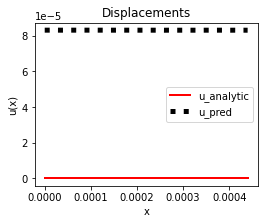

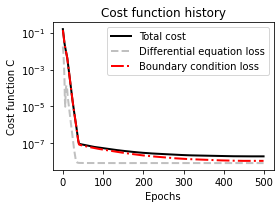

In [7]:
utilities.plot_displacements_bar(x_test, u_test, u_analytic)

pinnModel.plot_training_history()